#Name: Traian Fulea-Margarit
 

The LinkdIn Employment Growth data has been chosen for analysis. Data that captures industry and country-specific employment growth based on updates to LinkedIn member profiles. The analysis of this dataset allows organisations and individuals to compare labor markets across the world and identify skills in need. It could be beneficial for individuals who wish to switch career and pursue a new one within an industry with more opportunities and less competition. It is important to note that the data used captures the transitions among industries over time by LinkedIn members, as a proxy for the industry employment growths. Therefore, the data collected may or may not be a reliable reflection of the reality, as not all people may have a LinkedIn profile, especially in low income countries.

In [1]:
#import modules
import scipy, os
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Initialisation of the drive to import the data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Set up the directory in cloud
dir = '/content/drive/MyDrive/Employment Growth Project/'

#Import the dataset on the notebook
df = pd.read_excel(os.path.join(dir, 'public_use-industry-employment-growth.xlsx'), sheet_name='Growth from Industry Transition')

In [4]:
#Let's visualise the first 5 raws of the dataset
df.head()

,country_code,country_name,wb_region,wb_income,isic_section_index,isic_section_name,industry_id,industry_name,growth_rate_2015,growth_rate_2016,growth_rate_2017,growth_rate_2018,growth_rate_2019
0,ae,United Arab Emirates,Middle East & North Africa,High income,B,Mining and quarrying,56,Mining & Metals,0.078000,0.058550,0.043402,0.010048,-0.000621
1,ae,United Arab Emirates,Middle East & North Africa,High income,B,Mining and quarrying,57,Oil & Energy,0.033015,0.013479,0.017459,0.018514,0.022606
2,ae,United Arab Emirates,Middle East & North Africa,High income,C,Manufacturing,15,Pharmaceuticals,0.171367,0.136986,0.090631,0.048148,0.028423
3,ae,United Arab Emirates,Middle East & North Africa,High income,C,Manufacturing,23,Food Production,0.063351,0.038647,0.022137,0.005990,0.004317
4,ae,United Arab Emirates,Middle East & North Africa,High income,C,Manufacturing,52,Aviation & Aerospace,0.096607,0.056744,0.028673,0.015048,0.000816


In [5]:
#First of all we want to check if the dataset needs any preprocessing, and therefore we will be checking the data types and potential missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7335 entries, 0 to 7334
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country_code        7335 non-null   object 
 1   country_name        7335 non-null   object 
 2   wb_region           7335 non-null   object 
 3   wb_income           7335 non-null   object 
 4   isic_section_index  7335 non-null   object 
 5   isic_section_name   7335 non-null   object 
 6   industry_id         7335 non-null   int64  
 7   industry_name       7335 non-null   object 
 8   growth_rate_2015    7335 non-null   float64
 9   growth_rate_2016    7335 non-null   float64
 10  growth_rate_2017    7335 non-null   float64
 11  growth_rate_2018    7335 non-null   float64
 12  growth_rate_2019    7335 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage: 745.1+ KB


The above result indicate that we are dealing with 8 categorical features and 5 numerical, representing the growth of each industry from 2015 to 2019. Moveover, it is noticed that Nan values are non-existent and therefore not further pre-processing is needed at this stage. 

In [6]:
#Now we can obtain a quick description of the numerical features from the dataset
df.describe()

,industry_id,growth_rate_2015,growth_rate_2016,growth_rate_2017,growth_rate_2018,growth_rate_2019
count,7335.000000,7335.000000,7335.000000,7335.000000,7335.000000,7335.000000
mean,70.444853,0.000465,0.001303,0.000662,0.000499,0.000330
std,43.195772,0.057863,0.051965,0.044719,0.036628,0.027025
min,3.000000,-0.372654,-0.310484,-0.603328,-0.186667,-0.164179
25%,37.000000,-0.026549,-0.023920,-0.020628,-0.017104,-0.012658
50%,61.000000,-0.001190,-0.001036,0.000000,0.000000,-0.000468
75%,110.000000,0.023056,0.021858,0.018868,0.015649,0.011299
max,147.000000,1.084507,0.760417,0.459854,0.317073,0.345154


Note: it is important to remember that the values are expressed in percentages, as we work with growth rates. Therefore, one pre-processing step which can be applied is converting the numbers to percentages.

In [7]:
#Now we would like to list all the unique values from each category from the 8 categorical features priorly identified and print them
print("Countries: ", df['country_name'].unique(), "\n")
print("Regions: ", df['wb_region'].unique(), "\n")
print("Financial Status: ", df['wb_income'].unique(), "\n")
print("Sector: ", df['isic_section_name'].unique(), "\n")
print("Industry: ", df['industry_name'].unique())

Countries:  ['United Arab Emirates' 'Afghanistan' 'Albania' 'Armenia' 'Angola'
 'Argentina' 'Austria' 'Australia' 'Azerbaijan' 'Bosnia and Herzegovina'
 'Bangladesh' 'Belgium' 'Bulgaria' 'Bahrain' 'Benin' 'Bolivia' 'Brazil'
 'Botswana' 'Belarus' 'Canada' 'Congo, Dem. Rep.' 'Switzerland'
 "Cote d'Ivoire" 'Chile' 'Cameroon' 'China' 'Colombia' 'Costa Rica' 'Cuba'
 'Cyprus' 'Czech Republic' 'Germany' 'Denmark' 'Dominican Republic'
 'Algeria' 'Ecuador' 'Estonia' 'Egypt, Arab Rep.' 'Spain' 'Ethiopia'
 'Finland' 'France' 'United Kingdom' 'Georgia' 'Ghana' 'Greece'
 'Guatemala' 'Hong Kong SAR, China' 'Honduras' 'Croatia' 'Hungary'
 'Indonesia' 'Ireland' 'Israel' 'India' 'Iraq' 'Iran, Islamic Rep.'
 'Italy' 'Jamaica' 'Jordan' 'Japan' 'Kenya' 'Cambodia' 'Korea, Rep.'
 'Kuwait' 'Kazakhstan' 'Lebanon' 'Sri Lanka' 'Lithuania' 'Luxembourg'
 'Latvia' 'Libya' 'Morocco' 'Moldova' 'Madagascar' 'Macedonia, FYR'
 'Myanmar' 'Malta' 'Mauritius' 'Mexico' 'Malaysia' 'Mozambique' 'Namibia'
 'Nigeria' 'Nicaragu

In [8]:
#We would first like to see the transitions among industries for the countries from each financial status. 
df_income = df.groupby(['wb_income', 'isic_section_name'])[['growth_rate_2015', 'growth_rate_2016', 'growth_rate_2017', 'growth_rate_2018', 'growth_rate_2019']].mean()
df_income

growth_rate_2015  ...  growth_rate_2019
wb_income           isic_section_name                                                   ...                  
High income         Arts, entertainment and recreation                        0.014450  ...          0.005671
                    Financial and insurance activities                        0.033637  ...          0.012437
                    Information and communication                             0.024420  ...          0.007747
                    Manufacturing                                             0.022973  ...          0.006268
                    Mining and quarrying                                      0.027337  ...          0.007522
                    Professional scientific and technical activities          0.014121  ...          0.002883
Low income          Arts, entertainment and recreation                       -0.017009  ...         -0.000321
                    Financial and insurance activities                       -0.005195  ...         -0.002756
                    Information and communication                            -0.024218  ...         -0.005056
                    Manufacturing                                            -0.000208  ...          0.000331
                    Mining and quarrying                                     -0.027631  ...         -0.000739
                    Professional scientific and technical activities         -0.020849  ...         -0.002929
Lower middle income Arts, entertainment and recreation                       -0.003946  ...         -0.002048
                    Financial and insurance activities                       -0.001076  ...          0.000313
                    Information and communication                            -0.026343  ...         -0.008078
                    Manufacturing                                            -0.000032  ...          0.000621
                    Mining and quarrying                                     -0.016985  ...         -0.006149
                    Professional scientific and technical activities         -0.014278  ...         -0.005301
Upper middle income Arts, entertainment and recreation                       -0.013907  ...         -0.002581
                    Financial and insurance activities                       -0.014839  ...          0.000196
                    Information and communication                            -0.029606  ...         -0.008746
                    Manufacturing                                            -0.012247  ...         -0.004796
                    Mining and quarrying                                     -0.014670  ...         -0.004538
                    Professional scientific and technical activities         -0.024671  ...         -0.006786

[24 rows x 5 columns]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


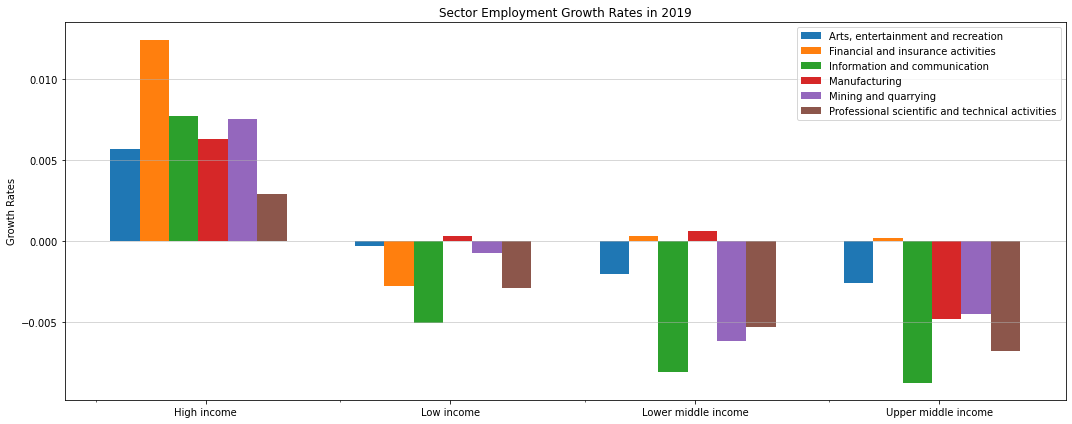

In [9]:
#Create the first visualisation of the project, which would allow to capture the industry transitions of LinkedIn members from each sector, for each type of economies in 2019

#Store the data into variable which will be used in the visualisation
economies = ['High income', 'Low income', 'Lower middle income', 'Upper middle income']
sectors = ['Arts, entertainment and recreation ', 'Financial and insurance activities', 'Information and communication', 'Manufacturing', 'Mining and quarrying', 'Professional scientific and technical activities']
art_ent_recr_growth_2019 = list(df_income.loc[(slice(None), 'Arts, entertainment and recreation '), 'growth_rate_2019'])
finance_growth_2019 = list(df_income.loc[(slice(None), 'Financial and insurance activities'), 'growth_rate_2019'])
info_growth_2019 = list(df_income.loc[(slice(None), 'Information and communication'), 'growth_rate_2019'])
manufact_growth_2019 = list(df_income.loc[(slice(None), 'Manufacturing'), 'growth_rate_2019'])
mining_growth_2019 = list(df_income.loc[(slice(None), 'Mining and quarrying'), 'growth_rate_2019'])
scientific_growth_2019 = list(df_income.loc[(slice(None), 'Professional scientific and technical activities'), 'growth_rate_2019'])

x = np.arange(len(economies))  # the label locations
width = 0.12  # the width of the bars

#Postion of the bars
fig, ax = plt.subplots(figsize=(15,6))
plt.grid(axis='y', linewidth=0.5) #add a grid for visualisation ease
rects1 = ax.bar(x + width, art_ent_recr_growth_2019, width, label='Arts, entertainment and recreation')
rects2 = ax.bar(x + 2*width, finance_growth_2019, width, label='Financial and insurance activities')
rects3 = ax.bar(x + 3*width, info_growth_2019, width, label='Information and communication')
rects4 = ax.bar(x + 4*width, manufact_growth_2019, width, label='Manufacturing')
rects5 = ax.bar(x + 5*width, mining_growth_2019, width, label='Mining and quarrying')
rects6 = ax.bar(x + 6*width, scientific_growth_2019, width, label='Professional scientific and technical activities')


#Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Growth Rates')
ax.set_title('Sector Employment Growth Rates in 2019')
ax.set_xticks(x, economies)
ax.legend()
plt.xticks(x+ 0.45, economies)

fig.tight_layout()

plt.show()

#Reference: https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html

It is suggested that in low income countries, the labor is predominantly moving towards manufacturing, while in upper middle and high income counttries, people have a tendency to switch career towards finance and insurance activities. However, it must be noted that no data is available with regards to the origins of the people and therefore the possibility of labor relocating from a low income country to a high income one cannot be excluded.

In [10]:
#Drawing our attention to the United Kingdom situation, we will filter the data so we can focus on the Employment Growth rates solely for United Kingdom
df_uk = df[df['country_name']=='United Kingdom']
df_uk.head()

,country_code,country_name,wb_region,wb_income,isic_section_index,isic_section_name,industry_id,industry_name,growth_rate_2015,growth_rate_2016,growth_rate_2017,growth_rate_2018,growth_rate_2019
2423,gb,United Kingdom,Europe & Central Asia,High income,B,Mining and quarrying,56,Mining & Metals,-0.029198,-0.029052,0.003628,0.007419,-0.005512
2424,gb,United Kingdom,Europe & Central Asia,High income,B,Mining and quarrying,57,Oil & Energy,-0.034213,-0.034078,-0.004376,0.005967,0.012526
2425,gb,United Kingdom,Europe & Central Asia,High income,C,Manufacturing,15,Pharmaceuticals,0.016302,0.018432,0.006842,0.003376,0.008191
2426,gb,United Kingdom,Europe & Central Asia,High income,C,Manufacturing,23,Food Production,-0.007904,-0.001368,-0.007317,-0.004495,-0.001464
2427,gb,United Kingdom,Europe & Central Asia,High income,C,Manufacturing,52,Aviation & Aerospace,-0.000880,0.012849,0.009954,0.012904,0.003786


In [11]:
#Following a similar approach, we will first look on the sectors and how these have changed over time
df_uk_sectors = df.groupby(['isic_section_name'])[['growth_rate_2015', 'growth_rate_2016', 'growth_rate_2017', 'growth_rate_2018', 'growth_rate_2019']].mean()
df_uk_sectors

,growth_rate_2015,growth_rate_2016,growth_rate_2017,growth_rate_2018,growth_rate_2019
isic_section_name,,,,,
"Arts, entertainment and recreation",0.002028,0.002794,0.002775,0.002056,0.001725
Financial and insurance activities,0.010764,0.007902,0.007516,0.006396,0.005564
Information and communication,-0.003956,-0.003428,-0.004747,-0.003582,-0.000861
Manufacturing,0.007255,0.007477,0.005605,0.004103,0.001749
Mining and quarrying,0.000568,0.001296,0.007247,0.002358,0.000301
Professional scientific and technical activities,-0.004888,-0.002255,-0.002549,-0.001715,-0.001891


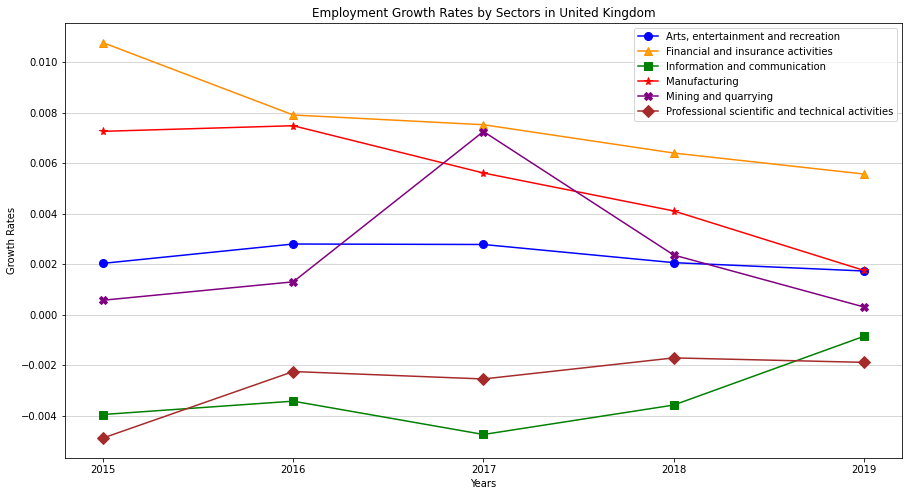

In [12]:
#We will now create a line graph, showing the trends of employment growth rates for each sector within the United Kingdom
sectors = ['Arts, entertainment and recreation ', 'Financial and insurance activities', 'Information and communication', 'Manufacturing', 'Mining and quarrying', 'Professional scientific and technical activities']

#Read the data as numpy arrays
art_ent_recr = df_uk_sectors.loc['Arts, entertainment and recreation ', :].to_numpy()
finance = df_uk_sectors.loc['Financial and insurance activities', :].to_numpy()
info = df_uk_sectors.loc['Information and communication', :].to_numpy()
manufact = df_uk_sectors.loc['Manufacturing', :].to_numpy()
mining = df_uk_sectors.loc['Mining and quarrying', :].to_numpy()
scientific = df_uk_sectors.loc['Professional scientific and technical activities', :].to_numpy()

#Adjust figure size
plt.figure(figsize=(15,8))

#Create the lines representing the growth trends
plt.plot(np.array(['2015', '2016', '2017', '2018', '2019']), art_ent_recr, marker='o', markerfacecolor='blue', markersize=8, color='blue', linewidth=1.5, label='Arts, entertainment and recreation ')
plt.plot(np.array(['2015', '2016', '2017', '2018', '2019']), finance, marker='^', markerfacecolor='orange', markersize=8, color='darkorange', linewidth=1.5, label='Financial and insurance activities')
plt.plot(np.array(['2015', '2016', '2017', '2018', '2019']), info, marker='s', markerfacecolor='green', markersize=8, color='g', linewidth=1.5, label='Information and communication')
plt.plot(np.array(['2015', '2016', '2017', '2018', '2019']), manufact, marker='*', markerfacecolor='red', markersize=8, color='r', linewidth=1.5, label='Manufacturing')
plt.plot(np.array(['2015', '2016', '2017', '2018', '2019']), mining, marker='X', markerfacecolor='purple', markersize=8, color='purple', linewidth=1.5, label='Mining and quarrying')
plt.plot(np.array(['2015', '2016', '2017', '2018', '2019']), scientific, marker='D', markerfacecolor='brown', markersize=8, color='brown', linewidth=1.5, label='Professional scientific and technical activities')



#Show legend and axis
plt.ylabel('Growth Rates')
plt.xlabel('Years')
plt.title('Employment Growth Rates by Sectors in United Kingdom')
plt.legend()
plt.grid(axis= 'y', linewidth=0.5)

#Show graph
plt.show()

#References: https://matplotlib.org/stable/api/markers_api.html
#            https://matplotlib.org/stable/gallery/color/named_colors.html


The above line chart indicates that financial and insurance activities have registered an increase in employment growth rates, suggesting that every year, more people are heading towards this career. Nonetheless, it is also interesting to note that in 2017, there was a major increase in the number of people who chose mining and quarrying, the growth rates jumping from around 1% to almost 8%. Moreover, other sectors, such as information and communication and professional scientific and technical activities have recorded steady decreases in employment rates from 2015 to 2019.

The sector with the highest increases in employment growth rates is clearly the financial and insurance activities. At this point, it would be interesting to compare the United Kingdom's employment growth rates in the financial sector to the average growth rates of the rest of high income countries in Europe and Central Asia.



In [39]:
#Filter the data to obtain only the financial sector within UK
df_finance_uk = df_uk[df_uk['isic_section_name']=='Financial and insurance activities']

#Extract the data only with regards to the high income countries from Europe and Central Asia
df_finance_restw = df[df['wb_region']=='Europe & Central Asia']
df_finance_restw = df_finance_restw[df_finance_restw['wb_income']=='High income']
df_finance_restw = df_finance_restw[df_finance_restw['isic_section_name']=='Financial and insurance activities']

In [46]:
#Visualise the two newly created datasets and shrink the uk dataset, in order to remain only with the growth rates. For the purpose of this analysis and due to the data format, this process does not alternate the results 
df_finance_uk

df_finance_uk_shrank = df_finance_uk.groupby('industry_name')[['growth_rate_2015', 'growth_rate_2016', 'growth_rate_2017', 'growth_rate_2018', 'growth_rate_2019']].mean()

In [47]:
print(df_finance_uk)
print(df_finance_uk_shrank)

     country_code    country_name  ... growth_rate_2018 growth_rate_2019
2459           gb  United Kingdom  ...         0.010470         0.001139
2460           gb  United Kingdom  ...         0.003138        -0.000148
2461           gb  United Kingdom  ...         0.013985         0.001349
2462           gb  United Kingdom  ...         0.019839        -0.005121
2463           gb  United Kingdom  ...         0.035083         0.024951
2464           gb  United Kingdom  ...         0.055287         0.038705
2465           gb  United Kingdom  ...         0.035054         0.039774

[7 rows x 13 columns]
                                  growth_rate_2015  ...  growth_rate_2019
industry_name                                       ...                  
Banking                                   0.018725  ...          0.001139
Capital Markets                           0.003404  ...          0.039774
Financial Services                        0.002256  ...          0.001349
Insurance              

In [15]:
df_finance_restw

,country_code,country_name,wb_region,wb_income,isic_section_index,isic_section_name,industry_id,industry_name,growth_rate_2015,growth_rate_2016,growth_rate_2017,growth_rate_2018,growth_rate_2019
319,at,Austria,Europe & Central Asia,High income,K,Financial and insurance activities,41,Banking,0.030960,0.016474,0.013183,0.016658,0.012505
320,at,Austria,Europe & Central Asia,High income,K,Financial and insurance activities,42,Insurance,0.020590,0.022501,0.018739,0.010013,-0.000734
321,at,Austria,Europe & Central Asia,High income,K,Financial and insurance activities,43,Financial Services,0.046284,0.044202,0.016016,0.018032,0.004265
322,at,Austria,Europe & Central Asia,High income,K,Financial and insurance activities,45,Investment Banking,0.016000,-0.033898,-0.008696,-0.008621,-0.047619
323,at,Austria,Europe & Central Asia,High income,K,Financial and insurance activities,46,Investment Management,0.038123,0.062874,0.020588,0.037791,0.034286
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6249,sk,Slovak Republic,Europe & Central Asia,High income,K,Financial and insurance activities,42,Insurance,0.036051,0.036099,0.014751,0.021654,0.023832
6250,sk,Slovak Republic,Europe & Central Asia,High income,K,Financial and insurance activities,43,Financial Services,-0.009332,-0.020059,-0.006038,0.003395,0.010765
6251,sk,Slovak Republic,Europe & Central Asia,High income,K,Financial and insurance activities,45,Investment Banking,-0.010101,-0.021505,0.011628,0.036145,0.011765
6252,sk,Slovak Republic,Europe & Central Asia,High income,K,Financial and insurance activities,46,Investment Management,-0.050955,-0.026846,0.065217,0.074830,0.031056


In [16]:
#Now we want to extract the mean values of the employment growth rates for each industry  in the rest of world dataset
df_finance_restw_ind = df_finance_restw.groupby('industry_name')[['growth_rate_2015', 'growth_rate_2016', 'growth_rate_2017', 'growth_rate_2018', 'growth_rate_2019']].mean()

df_finance_restw_ind

,growth_rate_2015,growth_rate_2016,growth_rate_2017,growth_rate_2018,growth_rate_2019
industry_name,,,,,
Banking,0.015705,0.013547,0.013333,0.001928,-0.000609
Capital Markets,0.034271,0.030952,0.012875,0.009996,-0.003026
Financial Services,0.024685,0.017437,0.017756,0.021408,0.011042
Insurance,0.022667,0.016852,0.008422,0.006400,0.009320
Investment Banking,0.035201,0.033657,0.008656,0.012011,0.007772
Investment Management,0.039143,0.044251,0.047196,0.027730,0.021290
Venture Capital & Private Equity,0.060627,0.063212,0.080225,0.068560,0.046920


In [20]:
#The following code allows the user to introduce a specific industry within the finance sector they are interested in. Running the program would display a visualisation showing only the industry of interest
industry = input()

Banking


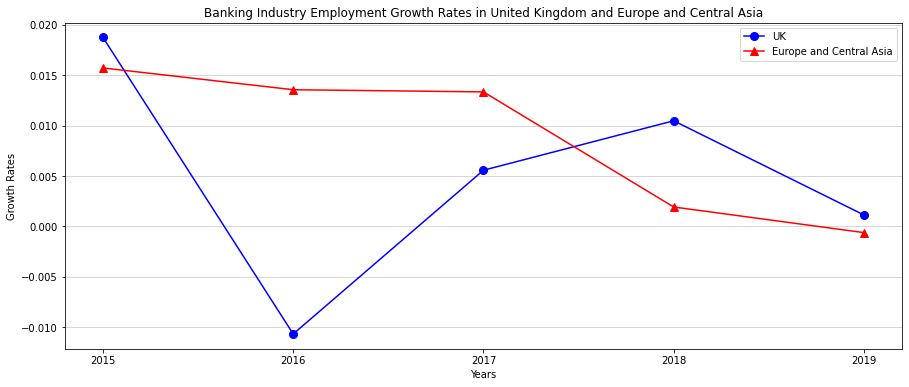

In [50]:
#We will create again a grouped barchart for each industry, comparing the UK employment growth rates to the mean growth rates from Europe and Central Asia
uk = df_finance_uk_shrank.loc[industry, :].to_numpy()
rw = df_finance_restw_ind.loc[industry, :].to_numpy()

uk.reshape((5,))
#Adjust figure size
plt.figure(figsize=(15,6))

#Create the lines representing the growth trends
plt.plot(np.array(['2015', '2016', '2017', '2018', '2019']), uk, marker='o', markerfacecolor='blue', markersize=8, color='blue', linewidth=1.5, label='UK')
plt.plot(np.array(['2015', '2016', '2017', '2018', '2019']), rw, marker='^', markerfacecolor='red', markersize=8, color='red', linewidth=1.5, label='Europe and Central Asia')

#Show legend and axis
plt.ylabel('Growth Rates')
plt.xlabel('Years')
plt.title('{0} Industry Employment Growth Rates in United Kingdom and Europe and Central Asia'.format(industry))
plt.legend()
plt.grid(axis= 'y', linewidth=0.5)

#Show graph
plt.show()

The above graph indicaes that UK suffered a decrease in employment rates within Banking industry in 2016, declining with almost 30%, while average rates in Europe and Central Asia maintained rather steady. Subsequently, in the following years, UK banking industry recorded increases in employment growth rates, maintaining itself above 0, meaning that every year, more and more people are choosing this path.

Final Comment: The dataset, small at a first glance, comprises many other valuable and very interesting information, which has not been fully explored in this notebook, due to limited time. However, the data is clean and clear enough to be subject to many other beautiful visualisation techniques such as histograms, maps and interactive graphs. Other areas could also be explored, such as comparisons between European employment growth rates to the values recorded in Asia, Africa and North America. Another interesting path to follow would have been to study the effect of a country's income on the employment rates, but grouped on geographical areas and even creating a choropleth map showing the areas which suffer or benefit of either low or high employment rates. (additional data would be required for this process I may say)